In [24]:
import numpy as np

from end2end import *
from datasets import SupervisedDataset
from matplotlib import pyplot as plt
import pickle
import torch
from scipy.stats import mode
from graspologic.utils import remap_labels


In [5]:
data = SupervisedDataset(input_dir='./data/pedreira/pedreira', input_dim=39)
raw_spikes, targets = data[10]
spikes = torch.from_numpy(raw_spikes).float()
targets = torch.from_numpy(targets)


In [23]:
with open('./local/e2e_sim_s10_forceloss.pkl', 'rb') as f:
    e2e = pickle.load(f)

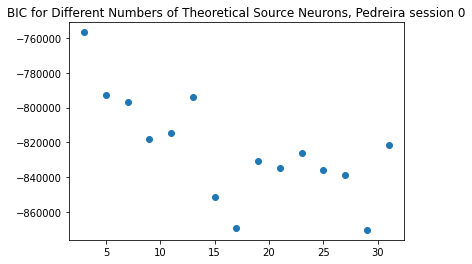

In [27]:
ks, bics = e2e.bics(raw_spikes)
plt.scatter(ks[1:-1], bics[1:-1])
plt.title("BIC for Different Numbers of Theoretical Source Neurons, Pedreira session 0")
plt.show()

In [21]:
BEST_K = 21
labels, _, embeddings = e2e.predict(raw_spikes, BEST_K, return_latent=True)

In [14]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
manifold = tsne.fit_transform(embeddings)
x = manifold[:, 0]
y = manifold[:, 1]

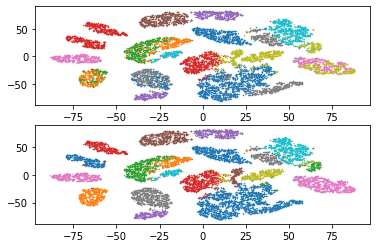

In [26]:
fig, ax = plt.subplots(2)
labels = remap_labels(targets, labels)
for c in range(BEST_K):
    ax[0].scatter(x[labels == c], y[labels == c], marker=".", s=.5)
    ax[1].scatter(x[targets == c], y[targets == c], marker=".", s=.5)


In [16]:
classes = torch.unique(targets)
num_classes = len(classes)
print(len(classes))

21


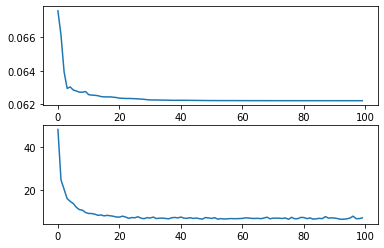

In [17]:
fig, ax = plt.subplots(2)
ax[0].plot(e2e.reconstruction_losses[21])
ax[1].plot(e2e.center_losses[21])

In [22]:
acc = e2e.validate(labels, targets.detach().numpy())
print(acc)

0.7958883994126285
